In [22]:
#A minimum of 5 variables in your dataset used during your analysis
#Read data set

import pandas as pd
boston_orig = pd.read_csv('boston_house_prices.csv')

boston_orig.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [23]:
boston_orig.shape

(506, 14)

In [24]:
# select columns to keepplot o

#CRIM per capita crime rate by town
#ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
#INDUS proportion of non-retail business acres per town
#CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX nitric oxides concentration (parts per 10 million) 
#RM average number of rooms per dwelling 
#AGE proportion of owner-occupied units built prior to 1940 
#DIS weighted distances to five Boston employment centres 
#RAD index of accessibility to radial highways 
#TAX full-value property-tax rate per $10,000 
#PTRATIO pupil-teacher ratio by town - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
#LSTAT % lower status of the population 
#MEDV Median value of owner-occupied homes in $1000's



In [25]:
cols = ['MEDV', 'CRIM', 'RM', 'AGE', 'TAX', 'RAD']
boston = boston_orig[cols]
boston.shape

(506, 6)

In [26]:
#column name headers
boston.head()

,MEDV,CRIM,RM,AGE,TAX,RAD
0,24.0,0.00632,6.575,65.2,296,1
1,21.6,0.02731,6.421,78.9,242,2
2,34.7,0.02729,7.185,61.1,242,2
3,33.4,0.03237,6.998,45.8,222,3
4,36.2,0.06905,7.147,54.2,222,3


In [27]:
#verifying the data types of each column
boston.dtypes

MEDV    float64
CRIM    float64
RM      float64
AGE     float64
TAX       int64
RAD       int64
dtype: object

In [28]:
#checking for missing data
pd.isna(boston).sum()

MEDV    0
CRIM    0
RM      0
AGE     0
TAX     0
RAD     0
dtype: int64

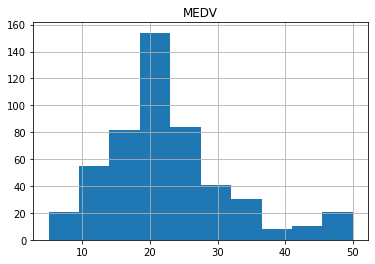

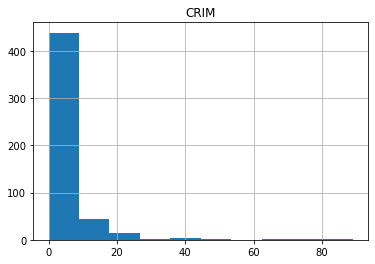

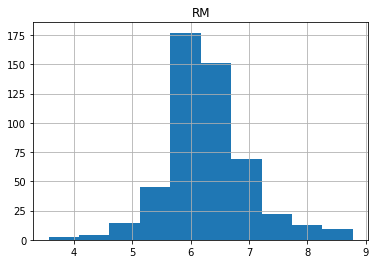

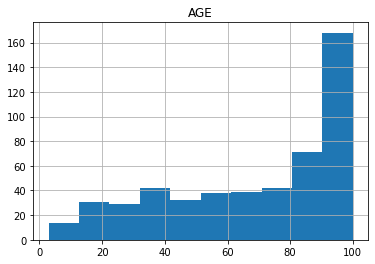

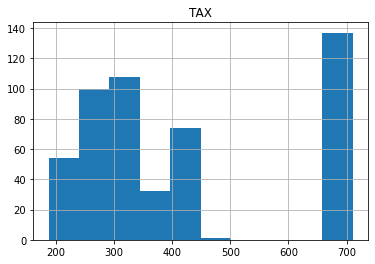

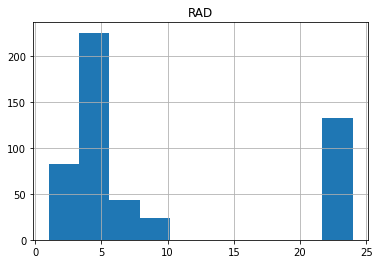

In [29]:
#include a histogram of each of the 5 variables 

for col in cols:
    boston.hist(column=col)

In [31]:
boston.mean()

MEDV     22.532806
CRIM      3.613524
RM        6.284634
AGE      68.574901
TAX     408.237154
RAD       9.549407
dtype: float64

In [32]:
#standard deviaiton
boston.std()

MEDV      9.197104
CRIM      8.601545
RM        0.702617
AGE      28.148861
TAX     168.537116
RAD       8.707259
dtype: float64

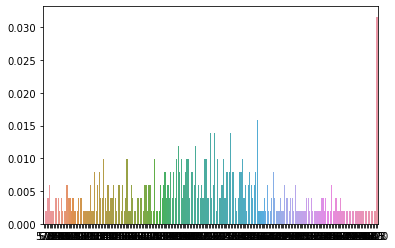

In [33]:
#PMF using pandas
import seaborn as sns
probabilities = boston['MEDV'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)


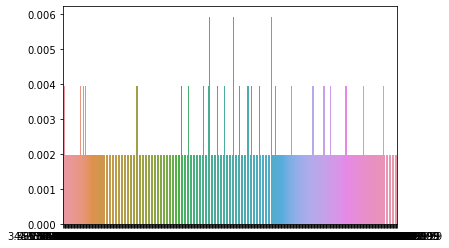

In [34]:
import seaborn as sns
probabilities = boston['RM'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)


In [35]:
#mean = boston.mean()
#var = spread
var = boston.var()
var


MEDV       84.586724
CRIM       73.986578
RM          0.493671
AGE       792.358399
TAX     28404.759488
RAD        75.816366
dtype: float64

In [36]:
#Cumulative distrribution function (cdf for MEDV)
def EvalCdf(t, x):
    """ t is series, x is value to calc CDF on """
    count = 0.0
    for value in t:
        if value <= x:
            count += 1 
    prob = count / len(t)
    return prob

In [37]:
# cacl CDF for MEDB 5 .. 50
cdf = []
x_values = []
for x in range(5,55,2):
    x_values.append(x)
    medv_cdf = EvalCdf(boston['MEDV'], x)
    cdf.append(medv_cdf)
print(cdf)

[0.003952569169960474, 0.011857707509881422, 0.041501976284584984, 0.0691699604743083, 0.10474308300395258, 0.191699604743083, 0.2509881422924901, 0.3458498023715415, 0.49209486166007904, 0.6245059288537549, 0.7549407114624506, 0.7786561264822134, 0.8181818181818182, 0.849802371541502, 0.8794466403162056, 0.9051383399209486, 0.9268774703557312, 0.9367588932806324, 0.9387351778656127, 0.9466403162055336, 0.9565217391304348, 0.9624505928853755, 0.9683794466403162, 1.0, 1.0]


In [38]:
# plot 

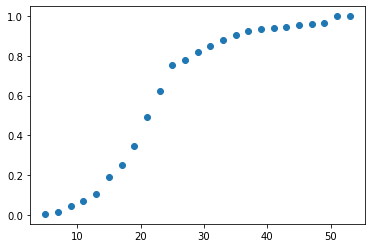

In [39]:
#scatter plot for CDF MEDV 

import matplotlib.pyplot as plt
plt.scatter(x_values, cdf)

In [40]:
#RM
cdf = []
x_values = []
for x in range(5,55,2):
    x_values.append(x)
    RM_cdf = EvalCdf(boston['RM'], x)
    cdf.append(RM_cdf)
print(cdf)

[0.03162055335968379, 0.8735177865612648, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


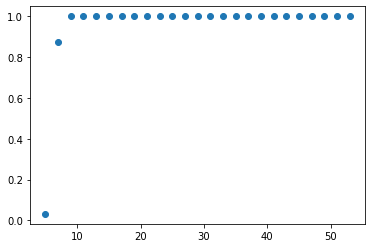

In [41]:
plt.scatter(x_values, cdf)

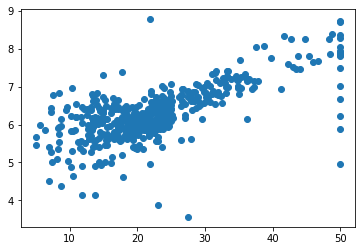

In [53]:
plt.scatter(boston['MEDV'], boston['RM'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c927b20>,
      dtype=object)

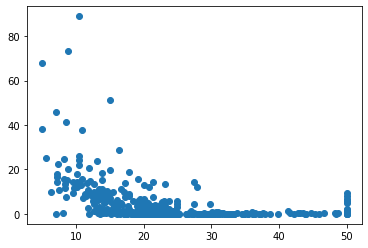

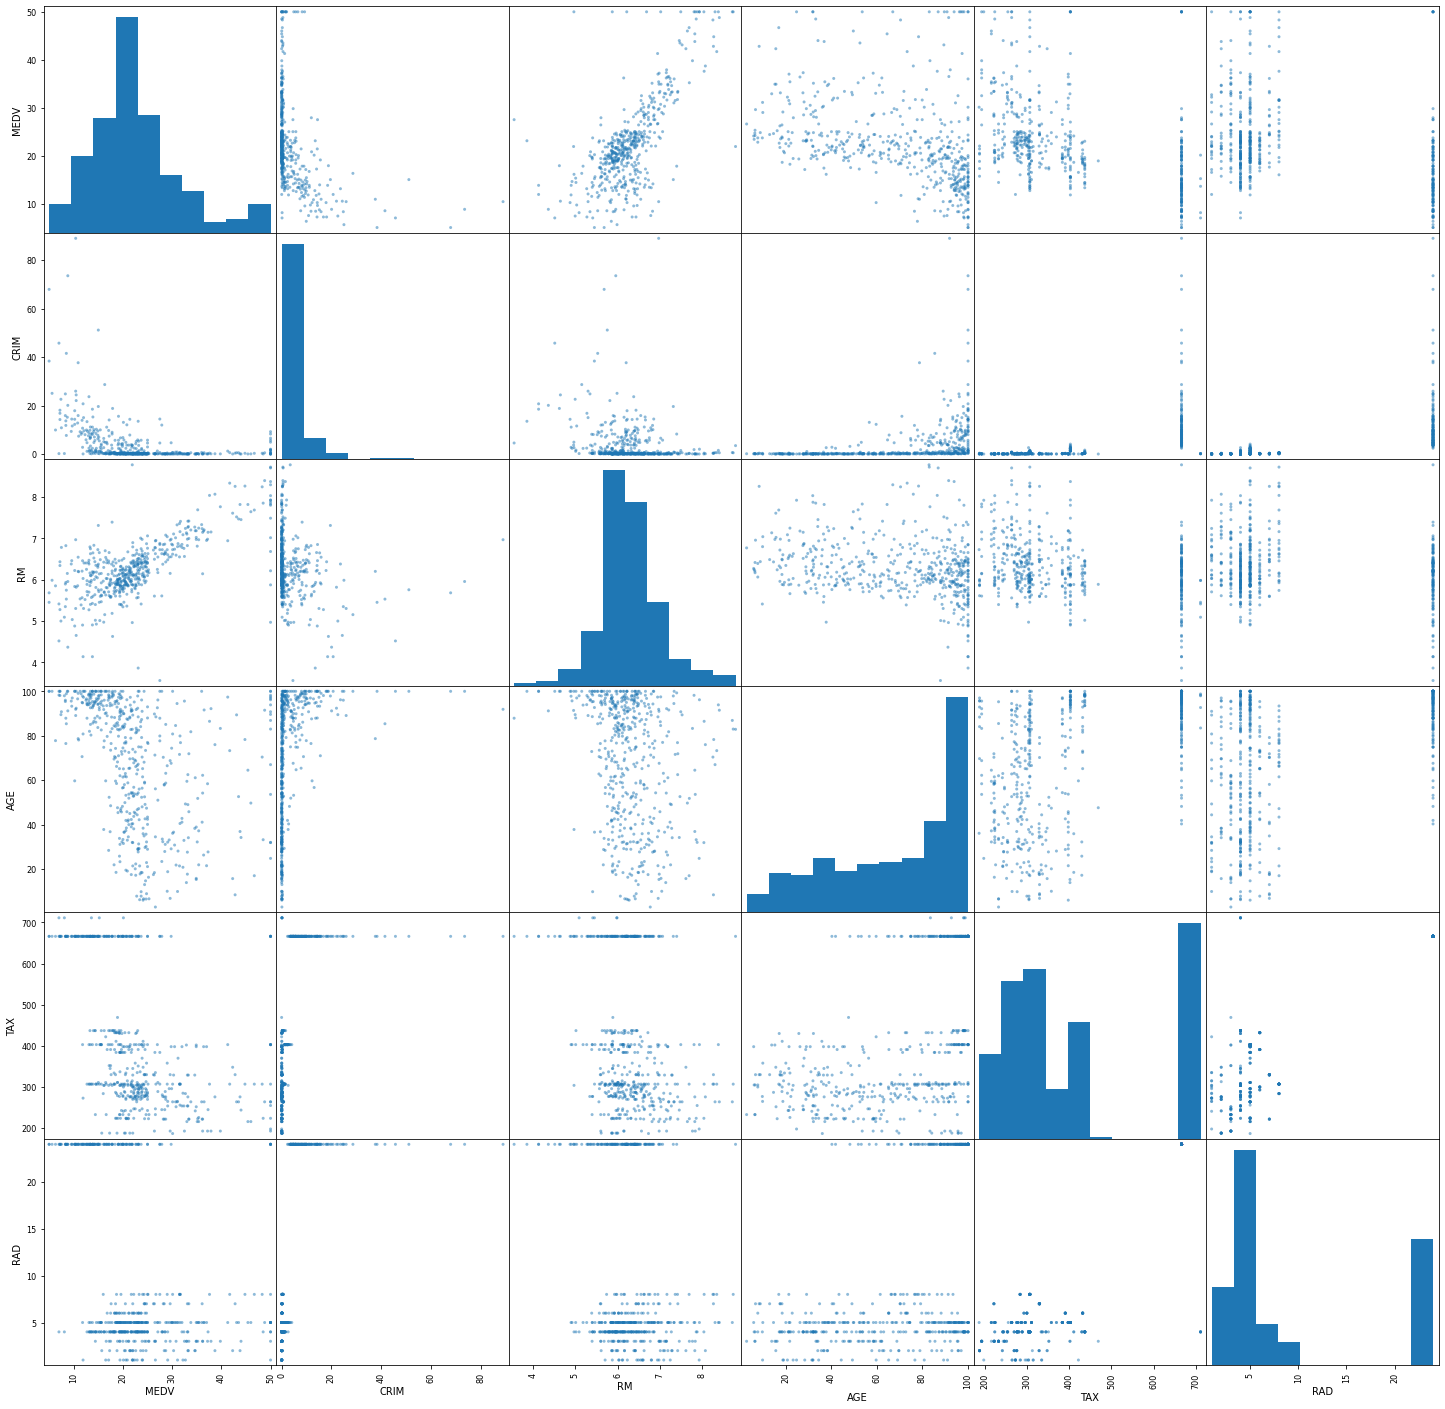

In [55]:
plt.scatter(boston['MEDV'], boston['CRIM'])

from pandas.plotting import scatter_matrix
scatter_matrix(boston, figsize=(25,25))

In [56]:
cols

['MEDV', 'CRIM', 'RM', 'AGE', 'TAX', 'RAD']

In [51]:
# Testing dff of means of MEDV and RM
abs( boston['MEDV'].mean() - boston['RM'].mean() )

16.24817193675891

In [52]:
# linear regr
from sklearn import linear_model

X = boston[['RM', 'AGE']]
y = boston['MEDV']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 8.40158122 -0.07277679]


In [53]:
dir(regr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
regr

In [55]:
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [58]:
import statsmodels.api as sm
X = boston[["RM", 'AGE']]
y = boston["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              3004.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):                   8.88e-281
Time:                        16:45:45   Log-Likelihood:                         -1685.7
No. Observations:                 506   AIC:                                      3375.
Df Residuals:                     504   BIC:                                      3384.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.8798      0.115     42.567      0.000       4.655       5.105
AGE           -0.1151      0.010    -11.765      0.000      -0.134      -0.096
==============================================================================
Omnibus:                      191.832   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.239
Skew:                           1.688   Prob(JB):                    8.35e-171
Kurtosis:                       8.074   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""